# plasma

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    degs = degs[!str_detect(degs$gene,'^RPL'),]
    degs = degs[!str_detect(degs$gene,'^RPS'),]
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
plasma = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/plasma.rds')

In [4]:
Idents(plasma) = plasma$minor
degs = FindAllMarkers(plasma,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster PC_IgG1

Calculating cluster PC_IgG2

Calculating cluster PC_IgG3

Calculating cluster PC_IgA

Calculating cluster Plasmablast



In [5]:
top_genes(degs)

PC_IgG1



           p_val avg_log2FC pct.1 pct.2    p_val_adj cluster     gene
1   1.952977e-85  1.0588150 0.964 0.827 3.718272e-81 PC_IgG1    IGHG3
2   5.025930e-36  0.9584437 0.717 0.448 9.568869e-32 PC_IgG1    IGHG2
3  5.600888e-102  0.8966891 0.971 0.839 1.066353e-97 PC_IgG1    IGHG1
4   2.440823e-68  0.7690378 0.984 0.952 4.647083e-64 PC_IgG1     IGKC
5   8.447313e-64  0.6178106 0.962 0.810 1.608284e-59 PC_IgG1    IGHG4
6   4.708691e-04  0.5100160 0.858 0.722 1.000000e+00 PC_IgG1    IGLC3
7   1.254404e-34  0.3113998 0.990 0.932 2.388259e-30 PC_IgG1     SSR4
8   2.308978e-25  0.2628060 0.908 0.747 4.396064e-21 PC_IgG1    PRDX4
9   3.525078e-03 -0.2500746 0.190 0.213 1.000000e+00 PC_IgG1    NUBPL
10  6.456595e-03 -0.2501186 0.390 0.382 1.000000e+00 PC_IgG1     MTG1
11  4.660141e-09 -0.2501186 0.161 0.227 8.872442e-05 PC_IgG1  RASGRP1
12  2.731479e-03 -0.2502243 0.223 0.245 1.000000e+00 PC_IgG1    PATL2
13  4.464843e-03 -0.2504151 0.513 0.485 1.000000e+00 PC_IgG1    VPS36
14  2.322204e-08 -0.

PC_IgG2



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster       gene
1  5.334199e-238   2.110779 0.973 0.758 1.015578e-233 PC_IgG2     FNDC3B
2  2.963191e-144   2.066842 0.901 0.734 5.641619e-140 PC_IgG2    ANKRD28
3  2.805873e-113   1.960506 0.539 0.189 5.342101e-109 PC_IgG2      TEX14
4  2.869998e-202   1.923700 0.957 0.733 5.464189e-198 PC_IgG2    ST6GAL1
5  7.710590e-128   1.884374 0.701 0.368 1.468019e-123 PC_IgG2      PELI1
6  7.785726e-184   1.848588 0.878 0.540 1.482324e-179 PC_IgG2    EIF2AK3
7  1.750361e-136   1.845608 0.874 0.456 3.332512e-132 PC_IgG2      IGLC1
8  1.071588e-187   1.802205 0.961 0.757 2.040197e-183 PC_IgG2      FBXW7
9  5.574769e-120   1.781222 0.944 0.936 1.061380e-115 PC_IgG2   HSP90AA1
10 2.044178e-144   1.751763 0.901 0.603 3.891910e-140 PC_IgG2     FCHSD2
11  7.546148e-90   1.733049 0.622 0.321  1.436711e-85 PC_IgG2      HSPH1
12  3.504637e-95   1.729305 0.802 0.642  6.672478e-91 PC_IgG2     SQSTM1
13 1.210029e-176   1.714298 0.885 0.428 2.303774e-1

PC_IgG3



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
1   1.257126e-47   3.917537 0.588 0.216  2.393443e-43 PC_IgG3  HLA-DRA
2   1.017682e-75   3.097516 0.620 0.154  1.937565e-71 PC_IgG3 HLA-DRB1
3   5.720321e-72   3.079875 0.781 0.311  1.089092e-67 PC_IgG3     CD37
4   3.253295e-44   3.028697 0.866 0.661  6.193948e-40 PC_IgG3     BTG1
5  1.331945e-110   2.983117 0.717 0.148 2.535891e-106 PC_IgG3     CD52
6   1.347632e-99   2.958679 0.535 0.078  2.565757e-95 PC_IgG3 HLA-DPB1
7   1.080393e-68   2.889993 0.995 0.908  2.056961e-64 PC_IgG3     CD74
8  5.000982e-152   2.782297 0.449 0.026 9.521369e-148 PC_IgG3      LTB
9  2.278305e-112   2.781182 0.519 0.061 4.337665e-108 PC_IgG3     CD69
10 8.612161e-244   2.748573 0.519 0.014 1.639669e-239 PC_IgG3    MS4A1
11  2.084250e-94   2.576800 0.754 0.202  3.968204e-90 PC_IgG3   LAPTM5
12  1.696043e-48   2.527427 0.636 0.268  3.229097e-44 PC_IgG3 HLA-DPA1
13  9.446829e-72   2.490112 0.337 0.038  1.798582e-67 PC_IgG3    BACH2
14  2.

PC_IgA



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
1  4.665710e-189  4.3868425 0.841 0.289 8.883045e-185  PC_IgA    IGHA2
2  8.338224e-185  3.4219723 0.975 0.746 1.587515e-180  PC_IgA    IGHA1
3  7.109695e-201  3.1085016 0.991 0.819 1.353615e-196  PC_IgA   JCHAIN
4   2.705051e-04  2.5900630 0.500 0.405  1.000000e+00  PC_IgA     IGHM
5   8.844033e-92  1.2596708 0.833 0.512  1.683815e-87  PC_IgA    FKBP2
6   3.208799e-54  0.8905073 0.989 0.943  6.109232e-50  PC_IgA  HSP90B1
7   7.225012e-05  0.7683182 0.814 0.776  1.000000e+00  PC_IgA    IGLC3
8   9.539126e-52  0.7410002 0.930 0.821  1.816154e-47  PC_IgA     CALR
9   1.424402e-41  0.7336588 0.792 0.623  2.711919e-37  PC_IgA TNFRSF17
10  6.462302e-43  0.7177652 0.957 0.877  1.230358e-38  PC_IgA    DERL3
11  3.742067e-51  0.6824440 0.794 0.535  7.124521e-47  PC_IgA     CD27
12  8.332031e-46  0.6293811 0.823 0.528  1.586335e-41  PC_IgA   S100A8
13  3.417136e-42  0.5849040 0.873 0.704  6.505885e-38  PC_IgA    PDIA4
14  2.

Plasmablast



           p_val avg_log2FC pct.1 pct.2     p_val_adj     cluster     gene
1   6.153094e-43   2.523227  0.89 0.506  1.171488e-38 Plasmablast   TUBA1B
2   1.979138e-42   2.402118  0.91 0.649  3.768081e-38 Plasmablast    H2AFZ
3   1.413667e-64   2.338049  0.85 0.239  2.691480e-60 Plasmablast    HMGB2
4   6.241977e-55   2.284364  0.99 0.914  1.188410e-50 Plasmablast    HMGB1
5   2.135442e-22   2.265924  0.92 0.853  4.065668e-18 Plasmablast     ACTB
6   2.399493e-19   2.240697  0.90 0.731  4.568395e-15 Plasmablast    ACTG1
7   3.018268e-38   2.221498  0.96 0.856  5.746481e-34 Plasmablast    GAPDH
8   1.763271e-37   2.177734  0.87 0.522  3.357092e-33 Plasmablast    HMGN2
9  1.421586e-101   2.139138  0.86 0.143  2.706557e-97 Plasmablast    STMN1
10  1.508431e-42   2.129534  0.99 0.958  2.871903e-38 Plasmablast     PTMA
11 2.095697e-219   1.905909  0.73 0.031 3.989997e-215 Plasmablast     RRM2
12  7.933720e-33   1.887176  0.81 0.387  1.510501e-28 Plasmablast HIST1H4C
13  3.922807e-27   1.8656

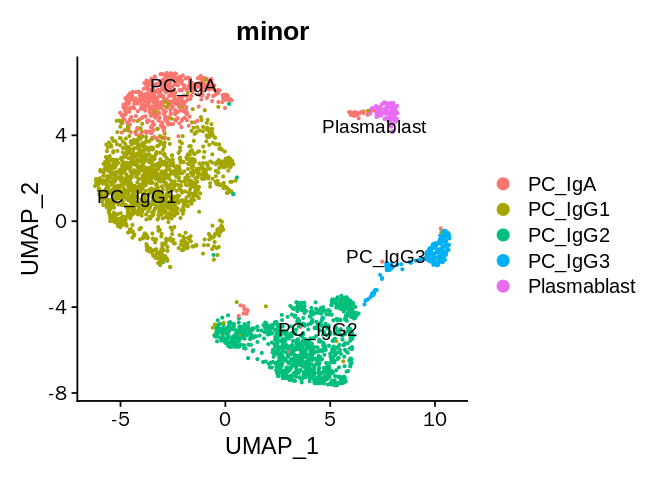

In [6]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(plasma, group.by = 'minor', label = TRUE,repel = TRUE)

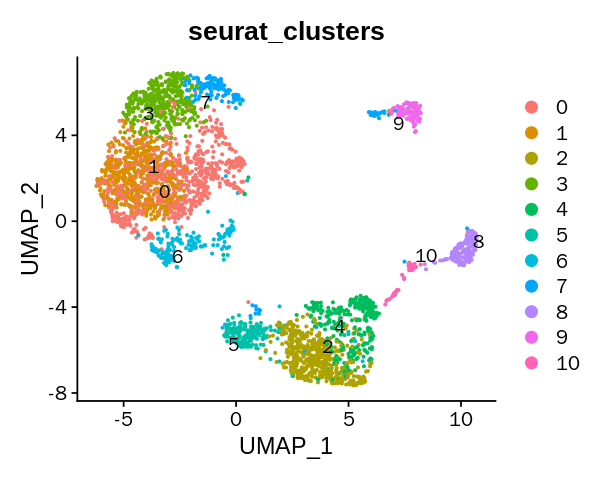

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(plasma, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

In [8]:
unique(plasma$minor)

[1] "PC_IgG1"     "PC_IgG2"     "PC_IgG3"     "PC_IgA"      "Plasmablast"

In [33]:
plasma$curated = plasma$minor
plasma$curated[plasma$curated == 'PC_IgG1'] = 'Plasma_IGHG2'
plasma$curated[plasma$curated == 'PC_IgG2'] = 'Plasma_PELI1'
plasma$curated[plasma$curated == 'PC_IgG3'] = 'others'
plasma$curated[plasma$curated == 'Plasmablast'] = 'Plasmablast_MKI67'
plasma$curated[plasma$curated == 'PC_IgA'] = 'Plasma_IGHA2'

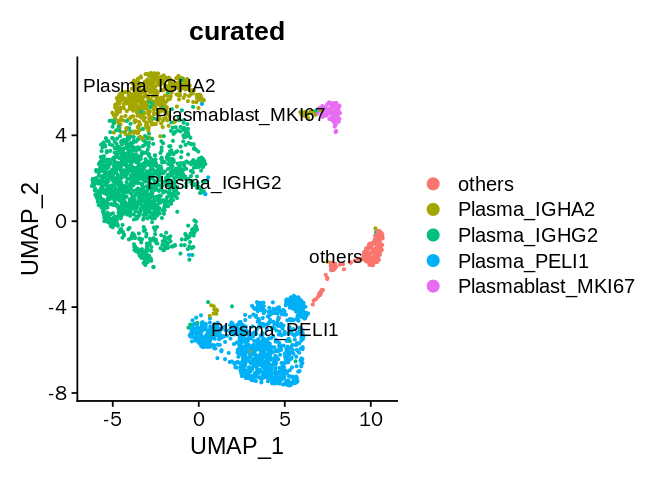

In [34]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(plasma, group.by = 'curated', label = TRUE,repel = TRUE)

In [35]:
saveRDS(plasma,file = '~/HPV/res/public_rna/seurat_rds/annotated/plasma.rds')